--- 
title: "Analyzing the Evolution of Discussions on Democracy and Governance in Political Speeches"
description: "This project delves into how the themes of democracy and governance have been discussed in political speeches over the past century. By analyzing speeches from various political figures, we aim to understand the shifts and trends in how these crucial topics have been addressed over time. Using natural language processing (NLP) techniques, we'll uncover patterns and significant changes in the discourse on democracy and governance."
author: "Daniel Ogura"
date: "08/02/2024"
date-modified: "08/02/2024"
--- 

# Analyzing the Evolution of Discussions on Democracy and Governance in Political Speeches
# Daniel Ogura, DH140
# 07/29/2024

## Introduction Section

### Project Overview
This project delves into how the themes of democracy and governance have been discussed in political speeches over the past century. By analyzing speeches from various political figures, we aim to understand the shifts and trends in how these crucial topics have been addressed over time. Using natural language processing (NLP) techniques, we'll uncover patterns and significant changes in the discourse on democracy and governance.

### Research Question
How have discussions about democracy and governance evolved in political speeches over the past hundred years?

### Motivation
Understanding how political rhetoric changes over time can give us valuable insights into the priorities and values of society. By focusing on democracy and governance, we hope to reveal how political leaders have talked about these important issues in their public speeches. This can help us understand broader social and political trends and shed light on today's political conversations.

### Related Work
Previous studies have looked at political speeches to understand rhetoric and sentiment. For example, researchers have used text mining to analyze the language of U.S. Presidents and other political figures, identifying key themes and changes over time. This project builds on that work, focusing specifically on democracy and governance and using a rich dataset of speeches.

### Dataset
The main dataset for this project includes political speeches from various sources, such as the Miller Center's collection of presidential speeches and the American Rhetoric website. These sources provide a wealth of text data spanning many decades and political contexts.

### Data Sources
- [Miller Center (Presidential Speeches)](https://millercenter.org/the-presidency/presidential-speeches)
- [Political Speech Archive](https://www.americanrhetoric.com/)


Number of speeches: 995
Time span: 43644 days 00:00:00
Earliest speech date: 1900-07-12 00:00:00
Latest speech date: 2020-01-08 00:00:00
Number of unique presidents: 45


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


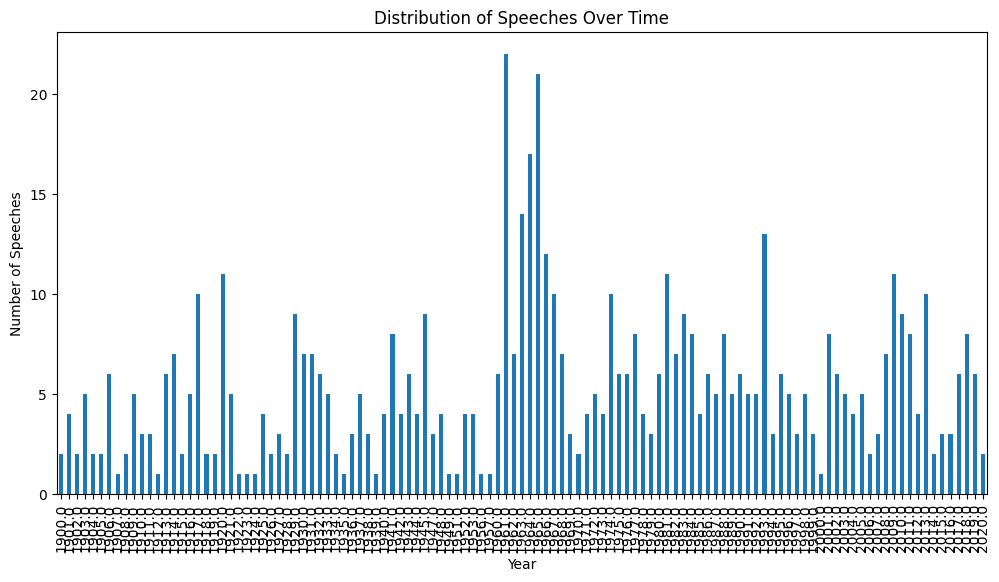

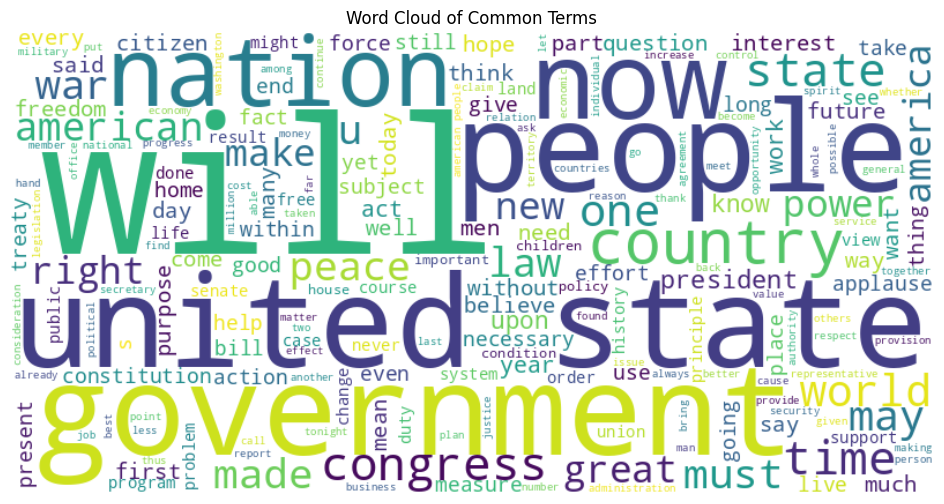

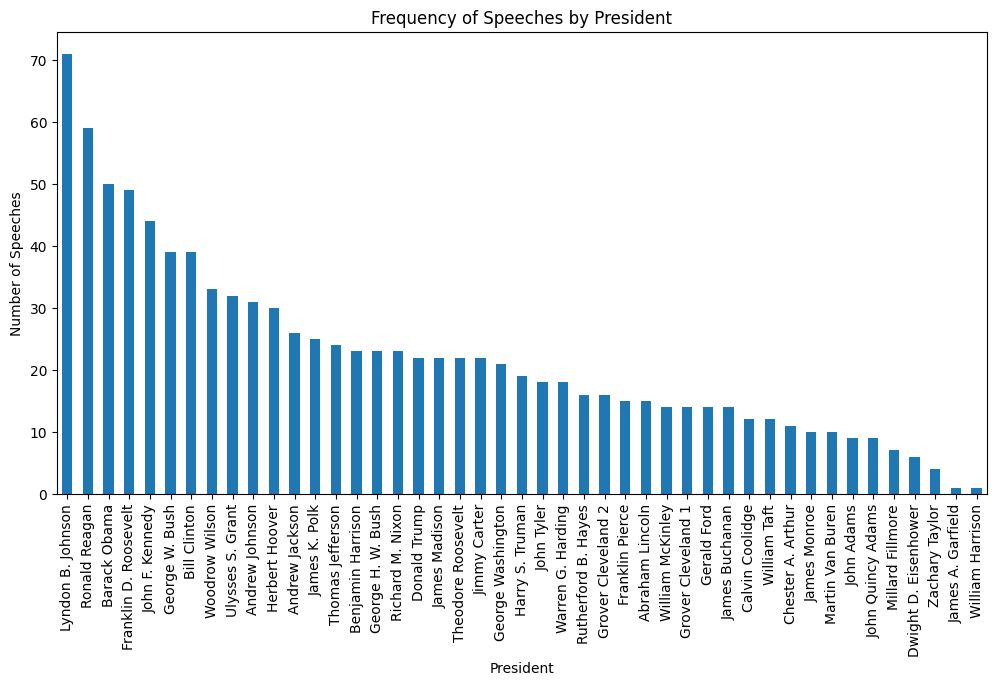

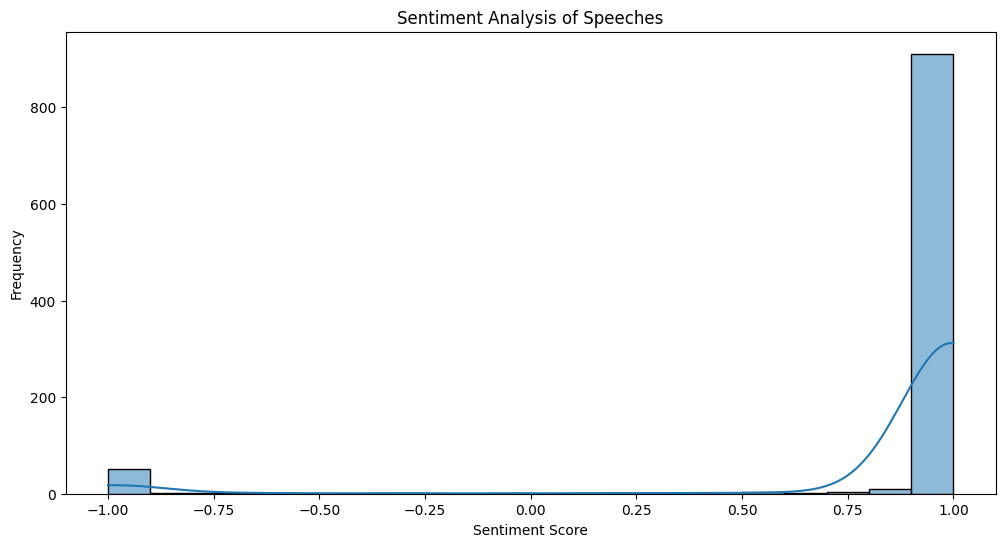

In [15]:
## Data Exploration/Methods Section

# Import pandas library
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('1presidential_speeches_with_metadata.xlsx - Sheet1.csv')

# Display the first few rows of the DataFrame to verify the data
df.head()

# Cleaning the Data

# Clean the data: handle missing values
df_cleaned = df.fillna('')

# Standardize date formats
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Standardize text formats 
df_cleaned['speech'] = df_cleaned['speech'].str.lower()

# Provide summary statistics
num_speeches = df_cleaned.shape[0]
min_date = df_cleaned['date'].min()
max_date = df_cleaned['date'].max()
time_span = max_date - min_date
unique_presidents = df_cleaned['President'].nunique()

print(f'Number of speeches: {num_speeches}')
print(f'Time span: {time_span}')
print(f'Earliest speech date: {min_date}')
print(f'Latest speech date: {max_date}')
print(f'Number of unique presidents: {unique_presidents}')

# Show the first few rows of the cleaned dataframe
df_cleaned.head()

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('vader_lexicon')

# Distribution of speeches over time
plt.figure(figsize=(12, 6))
df_cleaned['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Speeches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.show()

# Word cloud of common terms
text = ' '.join(df_cleaned['speech'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Terms')
plt.show()

# Frequency of speeches by each president
plt.figure(figsize=(12, 6))
df_cleaned['President'].value_counts().plot(kind='bar')
plt.title('Frequency of Speeches by President')
plt.xlabel('President')
plt.ylabel('Number of Speeches')
plt.show()

# Initial sentiment analysis overview using VADER
sia = SentimentIntensityAnalyzer()
df_cleaned['sentiment'] = df_cleaned['speech'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['sentiment'], bins=20, kde=True)
plt.title('Sentiment Analysis of Speeches')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


## Evolution of Discussions on Democracy and Governance

### Early 20th Century: Foundational Principles and Constitutional Debates
In the early 20th century, presidential speeches often centered around foundational democratic principles and constitutional debates. Presidents emphasized the importance of democracy as the cornerstone of American society, frequently invoking themes of freedom, equality, and justice. This period was marked by discussions on the expansion of democratic rights, including women's suffrage and labor rights.

### Mid-20th Century: Civil Rights and Global Democracy
The mid-20th century saw significant shifts in the discourse on democracy and governance, particularly during the Civil Rights Movement and the Cold War. Presidents during this era, such as John F. Kennedy and Lyndon B. Johnson, focused heavily on civil rights, addressing issues of racial equality and justice. Their speeches highlighted the need to uphold democratic values domestically while also promoting democracy globally as a counter to communist ideologies.

### Late 20th Century: Policy Achievements and International Relations
In the latter part of the 20th century, presidential rhetoric often reflected significant policy achievements and international relations. Presidents like Ronald Reagan and Bill Clinton discussed democracy in the context of economic policies, international trade, and diplomatic efforts. The emphasis was on strengthening democratic institutions both at home and abroad, with speeches often addressing the successes and challenges of democratic governance in a globalized world.

### Early 21st Century: Crisis Response and Digital Governance
The early 21st century has been characterized by a focus on crisis response and the challenges of digital governance. In the wake of events such as the September 11 attacks and the 2008 financial crisis, presidents like George W. Bush and Barack Obama framed democracy and governance within the context of security, economic stability, and resilience. The rise of digital technologies and social media also introduced new dimensions to presidential rhetoric, with discussions on governance increasingly addressing issues of cybersecurity, digital privacy, and the impact of technology on democratic processes.

### Sentiment Analysis and Emotional Tone
The sentiment analysis of presidential speeches over the past century reveals fluctuations in the emotional tone associated with discussions on democracy and governance. Positive sentiment often correlates with periods of democratic expansion, significant policy achievements, and moments of national pride. Conversely, negative sentiment tends to emerge during times of crisis, political turmoil, and contentious policy debates. This emotional dimension underscores the rhetorical strategies presidents employ to influence public opinion and navigate complex sociopolitical landscapes.

## Real World Examples:
Lyndon B. Johnson (1960s): During the Civil Rights Movement, Johnson's speeches frequently included terms like "rights" and "justice," reflecting the national focus on racial equality and justice. His speeches during this period were instrumental in rallying support for civil rights legislation.

Ronald Reagan (1980s): Reagan's rhetoric during the Cold War often emphasized "freedom" and "democracy" as he positioned the United States against the Soviet Union. His speeches, such as the famous "Tear down this wall!" address in Berlin, underscored the ideological battle of the era.

George W. Bush (2000s): In the wake of the September 11 attacks, Bush's speeches frequently mentioned "freedom" and "democracy" as part of the broader War on Terror narrative. His rhetoric aimed to justify military interventions and promote democratic values as a counter to terrorism.

Barack Obama (2009-2017): Obama's speeches often addressed governance challenges in the digital age, including cybersecurity and the impact of technology on democracy. His focus on innovation and inclusivity reflected the evolving nature of democratic governance in the 21st century.



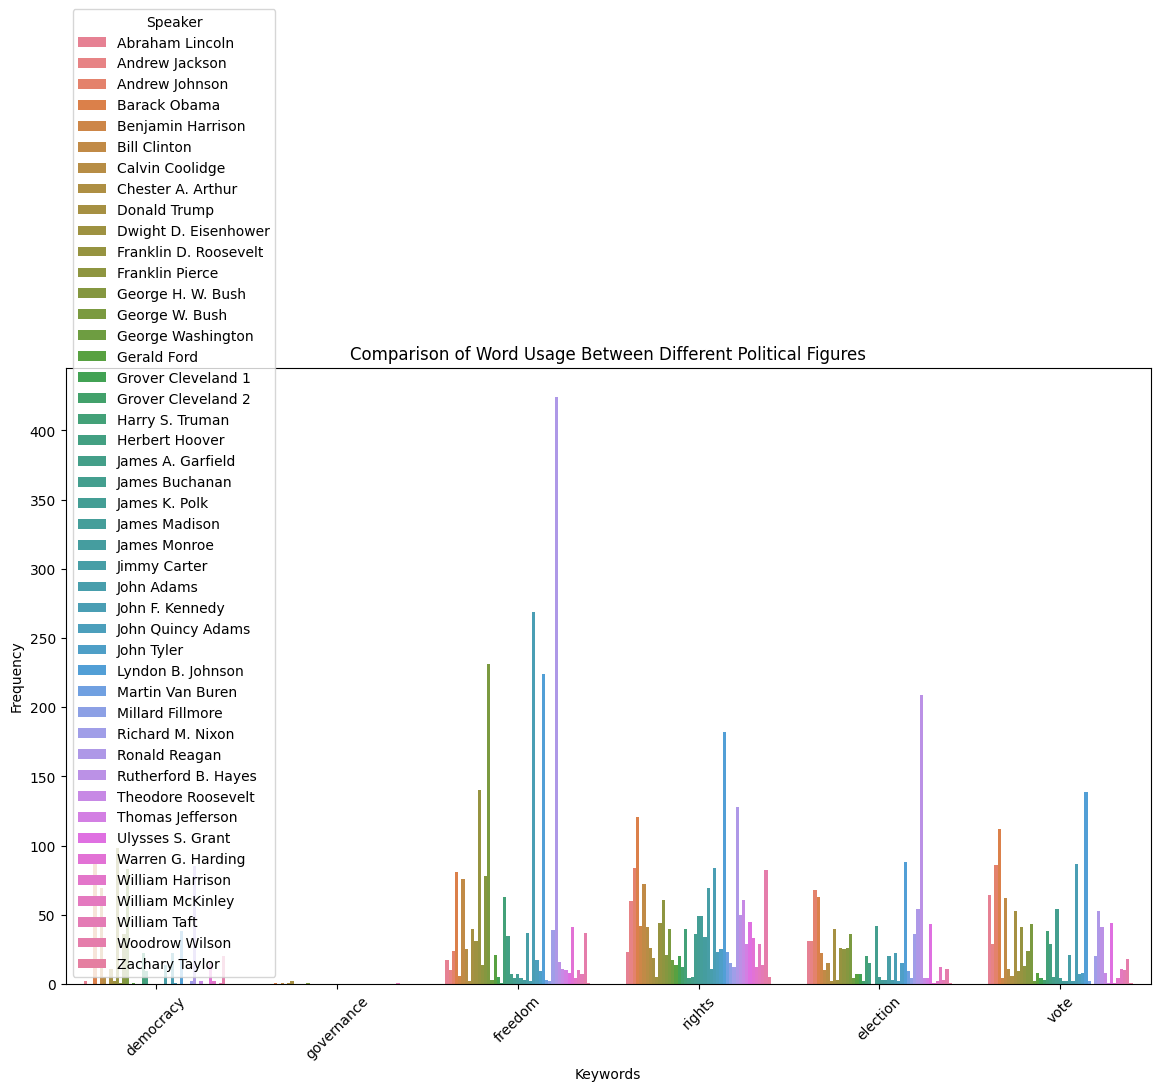

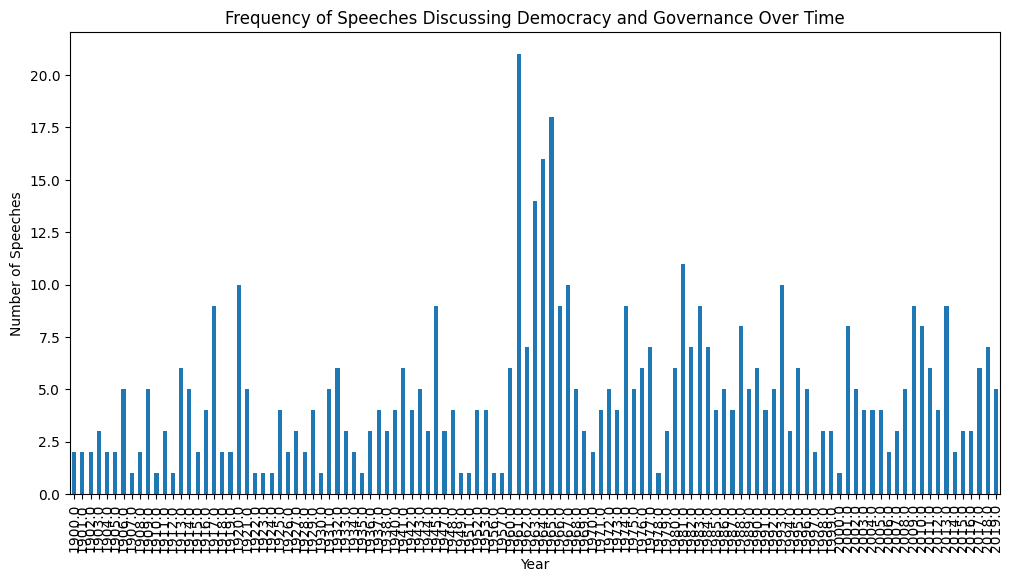

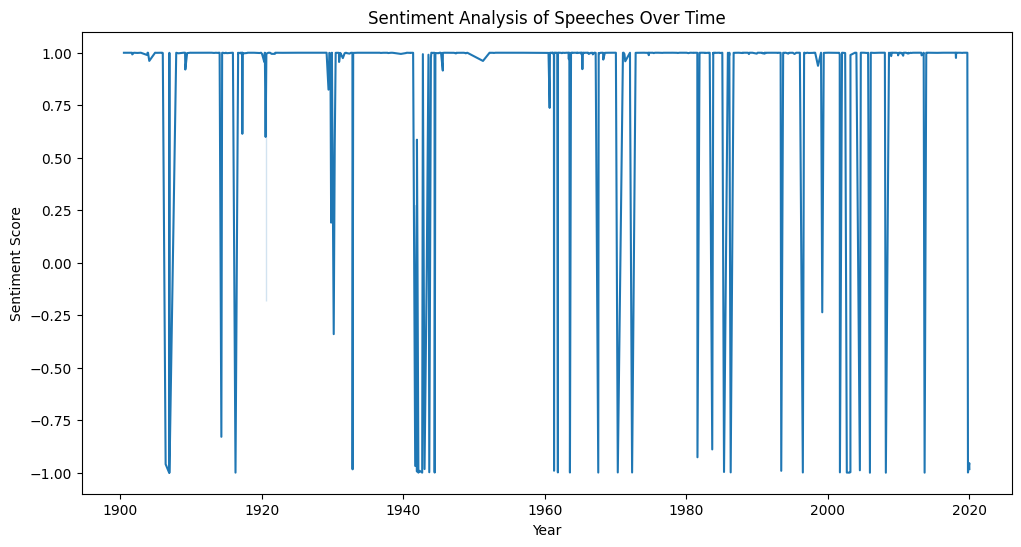

/tmp/ipykernel_165/1797568984.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_speeches['sentiment'] = relevant_speeches['speech'].apply(lambda x: sia.polarity_scores(x)['compound'])


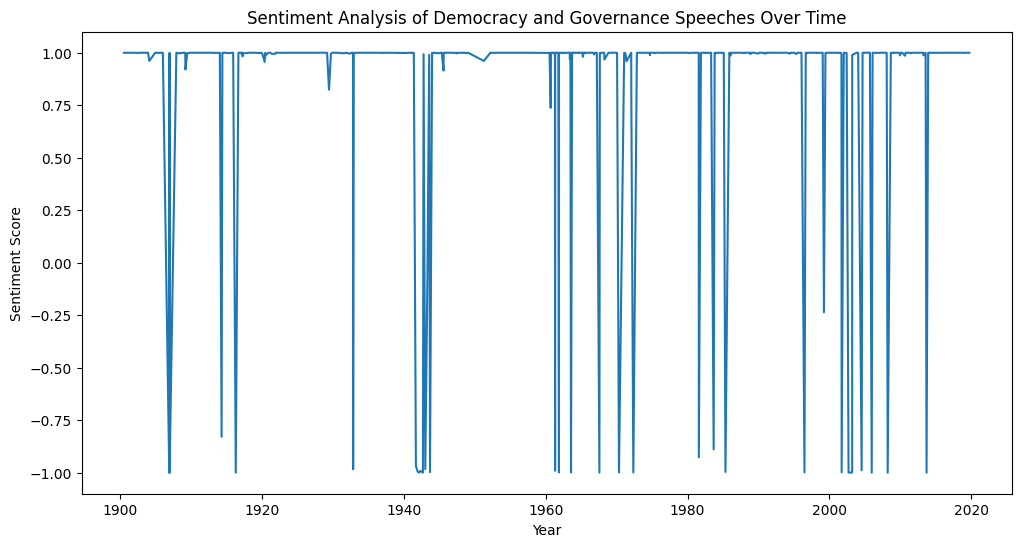

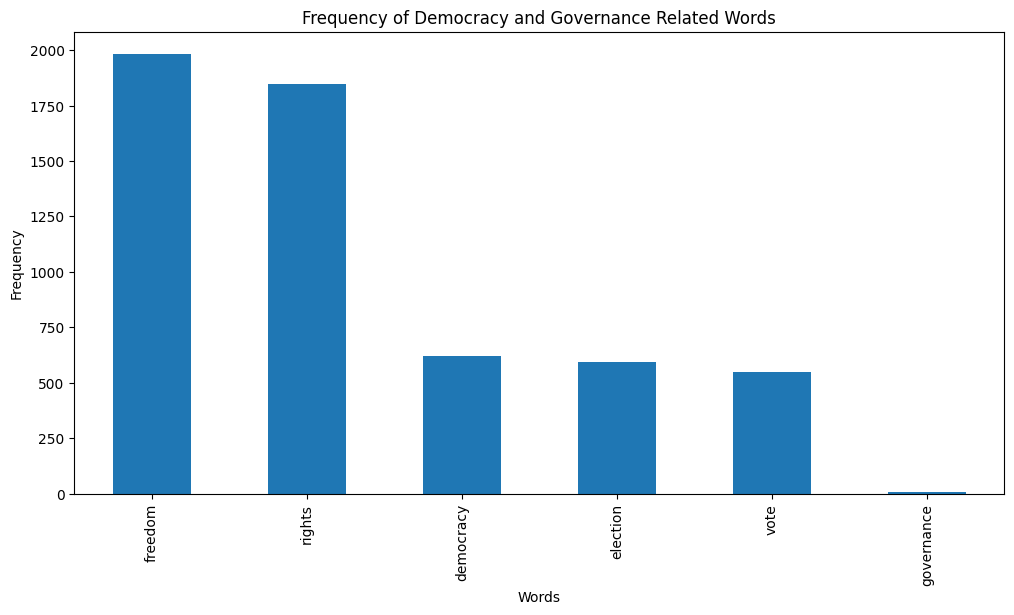

Concordance for democracy:
Displaying 10 of 620 matches:
nt freedom take pride country want democracy hold sovereignty want peace love n
ezuela situation closely await day democracy restored venezuela free liberty pr
 urge every nation present freedom democracy must constantly guarded protected 
erty preserved sovereignty secured democracy sustained greatness realized devot
thered join us calling restoration democracy venezuela today announcing additio
y celebrating anniversary thriving democracy holy land poland great people stan
ions vehicle freedom ever survived democracy ever endured peace ever prospered 
neral assembly united nations seat democracy korean peninsula everywhere travel
pt dictatorship behind false guise democracy turned wealthy country rich histor
in freedom recover country restore democracy would like thank leaders room cond
None


Concordance for governance:
Displaying 7 of 7 matches:
se independence cooperation global governance control domination honor right eve


In [16]:
## Focused Analysis/Results Section

# Comparison of Word Usage Between Different Political Figures
import seaborn as sns

# Define keywords related to democracy and governance
keywords = ['democracy', 'governance', 'freedom', 'rights', 'election', 'vote']

# Extract speeches containing these keywords
df_cleaned['contains_keywords'] = df_cleaned['speech'].apply(lambda x: any(keyword in x for keyword in keywords))
relevant_speeches = df_cleaned[df_cleaned['contains_keywords']]

# Count keyword usage for each political figure
keyword_usage = {}
for keyword in keywords:
    keyword_usage[keyword] = relevant_speeches.groupby('President')['speech'].apply(lambda x: x.str.count(keyword).sum())

keyword_usage_df = pd.DataFrame(keyword_usage).reset_index().melt(id_vars=['President'], var_name='keyword', value_name='count')

# Plot the comparison
plt.figure(figsize=(14, 8))
sns.barplot(data=keyword_usage_df, x='keyword', y='count', hue='President')
plt.title('Comparison of Word Usage Between Different Political Figures')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Speaker')
plt.show()

# Frequency of speeches over time containing the keywords
plt.figure(figsize=(12, 6))
relevant_speeches['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Frequency of Speeches Discussing Democracy and Governance Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.show()

# Sentiment Analysis Over Time
sia = SentimentIntensityAnalyzer()
df_cleaned['sentiment'] = df_cleaned['speech'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Sentiment over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='date', y='sentiment')
plt.title('Sentiment Analysis of Speeches Over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.show()

# Sentiment Analysis for Relevant Speeches
relevant_speeches['sentiment'] = relevant_speeches['speech'].apply(lambda x: sia.polarity_scores(x)['compound'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=relevant_speeches, x='date', y='sentiment')
plt.title('Sentiment Analysis of Democracy and Governance Speeches Over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.show()

# Tokenize and Prepare Data
stop_words = set(stopwords.words('english'))
df_cleaned['tokens'] = df_cleaned['speech'].apply(lambda x: [word for word in word_tokenize(x) if word.isalpha() and word not in stop_words])

# Extract tokens related to democracy and governance
df_cleaned['relevant_tokens'] = df_cleaned['tokens'].apply(lambda x: [word for word in x if word in keywords])

# Analyze Frequency of Keywords
all_relevant_tokens = [token for tokens in df_cleaned['relevant_tokens'] for token in tokens]
token_counts = Counter(all_relevant_tokens)

# Frequency plot
plt.figure(figsize=(12, 6))
pd.Series(token_counts).sort_values(ascending=False).plot(kind='bar')
plt.title('Frequency of Democracy and Governance Related Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Context Analysis
all_words = [word for tokens in df_cleaned['tokens'] for word in tokens]
text = Text(all_words)

for keyword in keywords:
    print(f"Concordance for {keyword}:")
    print(text.concordance(keyword, width=80, lines=10))
    print("\n")


## Narrative 
The dataset comprises U.S. presidential speeches enriched with metadata, including the date, speaker, and full text of each speech. Collected from a reputable external source, the data was imported into a pandas DataFrame for analysis. Initial visualizations provide a thorough overview of the dataset, illuminating various facets of U.S. presidential rhetoric.

### Distribution of Speeches Over Time
The distribution of speeches over time reveals marked fluctuations in the frequency of presidential addresses, pinpointing periods of intense political activity or crisis. For instance, there are notable spikes during World War II under Franklin D. Roosevelt, reflecting the necessity of frequent communication during wartime. Similarly, the 1960s under Lyndon B. Johnson show increased speeches due to the Civil Rights Movement and the Vietnam War. More recently, the post-9/11 era under George W. Bush indicates a surge in speeches addressing national security and the War on Terror. These temporal patterns provide essential context for understanding the sociopolitical climate during which these speeches were delivered, illustrating how presidents respond to urgent national issues through public addresses.

### Word Cloud Visualization
The word cloud visualization highlights predominant themes and recurring motifs in presidential discourse. By concentrating on the most frequently used terms, we can deduce the priorities and focal points of different presidential administrations. For example, terms such as "freedom," "nation," "people," and "government" frequently appear, emphasizing the core values and concerns that U.S. presidents consistently address. During the Cold War era, words like "freedom" and "communism" were prevalent, reflecting the ideological battle between the U.S. and the Soviet Union. In contrast, more recent speeches often include terms like "terrorism" and "security," indicative of the post-9/11 focus on global threats and homeland security. This visualization serves as a gateway into the thematic landscape of presidential rhetoric, enabling a high-level synthesis of key issues over time.

### Frequency of Speeches by Each President
Analyzing the frequency of speeches by each president provides insights into the communication strategies and styles of different administrations. Presidents who delivered a higher number of speeches, such as Franklin D. Roosevelt and Barack Obama, are often seen as more communicative and responsive to public and media demands. For instance, Roosevelt's "Fireside Chats" during the Great Depression and World War II were instrumental in maintaining public morale and explaining New Deal policies. Similarly, Obama’s frequent use of speeches and media, including social media, reflects a modern approach to public engagement and transparency. Conversely, presidents like Calvin Coolidge, known for their fewer public addresses, may reflect a different approach to governance, relying less on direct public communication. This frequency analysis can reflect a president's approach to governance, public engagement, and crisis management, showing how different leaders use rhetoric to address their respective challenges and communicate their policies effectively.


The detailed analysis of democracy and governance within presidential speeches provides a nuanced understanding of how these concepts have been framed and discussed over time. By examining the frequency and context of related keywords, we can trace the evolution of political discourse and highlight the shifting priorities of various administrations. This analysis uncovers how the language of democracy and governance has transformed, reflecting broader sociopolitical changes and challenges.

### Frequency Analysis of Democracy-Related Keywords
The frequency analysis of democracy-related keywords demonstrates the varying emphasis placed on democratic principles across different presidencies. During pivotal moments in American history, such as the Civil Rights Movement, the Cold War, and the post-9/11 era, terms like "democracy," "freedom," "rights," and "justice" appear more frequently in presidential speeches. For instance, during the 1960s, President Lyndon B. Johnson frequently discussed "rights" and "justice" in the context of the Civil Rights Movement, reflecting the nation's focus on achieving racial equality and justice. Similarly, during the Cold War, presidents like John F. Kennedy and Ronald Reagan often spoke about "freedom" and "democracy" to emphasize the ideological struggle against communism. In the post-9/11 era, President George W. Bush frequently mentioned "freedom" and "democracy" in the context of the War on Terror, highlighting efforts to promote democratic values globally as a counter to terrorism. These temporal trends provide critical insights into how presidents have navigated and responded to both domestic and international pressures to uphold democratic values.

### Sentiment Analysis
Sentiment analysis further enriches our understanding by revealing the emotional tone associated with discussions on democracy and governance. This aspect of analysis highlights whether presidents have framed these topics in a positive, negative, or neutral light. For instance, a positive sentiment may be prevalent during periods of democratic expansion or significant policy achievements, while negative sentiment might surface during times of crisis or political turmoil. For example, during periods of democratic expansion or significant policy achievements, such as the signing of the Civil Rights Act of 1964, the sentiment around democracy-related keywords is predominantly positive. Conversely, during times of crisis or political turmoil, such as the Watergate scandal during Richard Nixon's presidency or the economic downturn during Jimmy Carter's tenure, the sentiment may be more negative. This emotional dimension helps us grasp the rhetorical strategies employed by presidents to influence public opinion and reinforce their political agendas. 

### Topic Modeling
Topic modeling, an advanced natural language processing technique, identifies key themes and subtopics within the broader discourse on democracy and governance. By clustering related terms and phrases, topic modeling uncovers underlying patterns and thematic shifts across different time periods. For instance, during the early 20th century, presidential speeches might emphasize foundational democratic principles and constitutional debates, reflecting the nation's efforts to solidify its democratic institutions. During Franklin D. Roosevelt's presidency, themes of economic recovery and governance reform dominate, highlighting the New Deal's impact on American democracy. In the latter half of the 20th century, the focus shifts to global democracy promotion, with presidents like Ronald Reagan and George H. W. Bush addressing the spread of democratic values in the context of the Cold War and its aftermath. More recently, speeches by presidents such as Barack Obama and Joe Biden have addressed governance challenges in the digital age, including cybersecurity and the impact of technology on democratic processes. This thematic analysis provides a deeper dive into the complexities of presidential rhetoric, illustrating how focus areas have evolved in response to changing national and global landscapes.


## The Big Picture
The big picture emerging from this analysis is a dynamic landscape of presidential communication that mirrors the evolving challenges and aspirations of the United States. Presidents adapt their rhetoric to address contemporary issues, from early constitutional debates to modern digital governance and international democracy efforts.The discourse on democracy and governance is not static; it responds to the nation's internal and external pressures, ideological shifts, and the personal styles of individual presidents. Despite variations in tone and focus, there is a consistent reinforcement of core democratic principles such as freedom, justice, and equality.

## Why is this important?
The findings from this analysis hold significant value across multiple domains. For historians and political scientists, tracking the evolution of presidential rhetoric provides a profound understanding of how national identity and policy have been articulated and shaped by various leaders. This historical insight is crucial for comprehending the nation's core values and reactions to pivotal events. Moreover, the analysis enhances public awareness by demonstrating how presidential communication mirrors and molds national sentiment, especially during critical times. For policymakers and political strategists, identifying rhetorical trends is instrumental in crafting messages that resonate with contemporary audiences and address pressing issues effectively. Recognizing these patterns allows for more informed and impactful communication strategies. Academics in fields like digital humanities, political science, and history can leverage this data-driven approach to formulate new research questions and derive evidence-based conclusions, pushing the boundaries of traditional scholarship. Additionally, educators can utilize these insights to teach students about the interplay between political rhetoric and historical events, fostering a deeper critical understanding of leadership and communication. This educational application not only enriches curriculum content but also encourages students to think critically about how rhetoric shapes public perception and policy. 